<h1 class="western" style="font-weight: normal; text-align: center;"><span style="color: #0000ff;"><span style="font-family: Liberation Serif, serif;">Chemical Evolution of the Milky Way</span></span></h1>

###### Authors:

* .
* .
* .
* .


In [11]:
# Libraries 

import numpy as np
import matplotlib.pylab as plt

## 1 - Description




<h3>1.1 Motivation:</h3>
<p>This code is a product of the project "Chemical Evolution of MW" developed at the 41th ISYA, Socorro -&nbsp; Colombia by the authors above. <span lang="en">Our goal is to perform a description of the distribution of metallicity of the stars of our galaxies over time, focusing mainly on the distribution observed in the current time. In order to do that, we built a code which solves the system of differential equations developed by xxxxx, called Closed Box Model. <br /></span></p>


### 1.2 Goals:

* Construct a code that returns the **probability distribution of metallicity at different times** and
make a **comparison with the literature**.
* Compare the model with **observational data** in order to identify the efficiency of the treatment.
* Consider a **modification of the model**, assuming mass outflows and identify what the final outcome change is.

WHAT ELSE??

### 1.3 Closed Box Model

For a complete understanding of the evolution of the chemical elements in our Galaxy, we need to identify which are the chemical processes that influence the appearance of these elements and which are the mechanisms that carry out their distribution.

The so-called light chemical elements, such as H, He and D, were formed in the primordial nucleosynthesis at the beginning of the Universe's history and are the most abundant elements still today. Elements heavier than helium are called metals and are formed inside the stars. The evolution of these objects leads to their death and, in the case of more massive stars, the enrichment of the interstellar medium through the process of supernova type II explosion. Besides this process, the metals can be formed during the explosion of type Ia supernovae (Giant Red system + white ana). It is important to note that the fraction of formed metals varies for each type of supernova.

Considering such information, our treatment is based on the closed box model, initially proposed by Txxx (1980). This model assumes:

* the galaxy's gas is well-mixed (had the same initial com position everywhere)
* IRA (instantaneous reciclying assumption) -the (high-mass) stars return their nucleosynthetic products rapidly, much faster than the time to form a significant fraction of the stars. 
* no gas escapes from or is added to the galaxy 

We get the following distribution:

$$
Z = y ln \frac{1}{\mu}
$$


## 2 - Initial conditions:
we need reliable references


In [12]:
M0_gas   =4e10  #en Msun
gal_diam =30000 #en pc (30 en kpc)
gal_radi =15000 #en pc (15 en kpc)
gal_width=400   #en pc (0.4 en kpc)
gal_vol  =(np.pi*gal_radi**2)*gal_width
volum_gas_density=1.*M0_gas/gal_vol
surf_gas_density =volum_gas_density*gal_width

## 3 - Functions:

We define some functions used in our methodology:



### 3.1 - IMF: Initial Mass Function

The initial mass function (IMF) is an empirical function that describes the initial distribution of masses for a population of stars. The IMF is often given as a probability distribution function (PDF) for the mass at which a star enters the main sequence.

<p><img src="http://www.astro.ljmu.ac.uk/~ikb/research/IMFs.gif" alt="" width="341" height="310" /></p>

Among the different models of MFIs presented, we adopted the model of Salpeter (year) for our model. **The IMF is constante in time.**

$$
IMF = \frac{1}{16.5816} * m^{-2.35}
$$

[IMF] = adm

In [13]:
def imf_salp(m):
    imf = (1. / 16.5816) * (m ** -2.35)
    return imf

### 3.2 - Star Formation Rate

The star formation rate is the total mass of stars formed per year. 

**Kennicutt-Schmidt Law**

A key ingredient in the understanding and modelling of galaxy evolution is the relationship between the large-scale star formation rate (SFR) and the physical conditions in the interstellar medium (ISM). The KS law relates the star formation rate of a galaxy with its density surface of gas:


$$
\psi(t) = \nu \sigma_{gas}^{k} =SFR
$$

Each:

$[\psi(t)] =  \frac{M_{\odot}}{yr \cdot Mpc^{2}}$

$[\sigma_{gas}] =  \frac{M_{\odot}}{\cdot Mpc^{2}}$

$k = 1.4$ y $\nu = 2.5*10^{-4} M_{solar} /yr / kpc^2$ 

WHAT ASSUMPTIONS?

In [14]:
##----------STAR FORMATION RATE----------------
nu= 176714586.76442587
k= 1.4
def SFR(rho):
    return nu*(rho)**k


# EJECTED MASS ??

In [15]:
def eject_gas(m,new_rho):
 #age=stellar_age(m)
 if m<1:
     return 0
 else:
  eject=(m-remnant_mass(m))*SFR(new_rho)
 return eject



# EQUATIONS

$$
\frac{dM_{gas}}{dt} = -\psi(t) + \int_{m(t)}^{\inf} (m-M_r) \psi(t-\tau_r) \phi(m) dm
$$

where $m_{gas}(0) = M_{tot}  = const$, $\mu = M_{gas}/M_{tot}$ as the fractional gas , where the metalicity is $Z= M_z / M_{gas} $  is zero at time $t=0$. So we have 

$$
\frac{dZ M_{gas}}{dt} = -Z\psi(t) + \int_{m(t)}^{\inf} [(m-M_r) Z(t-\tau_r)+ m p_{Zm} ] \psi(t-\tau_r) \phi(m) dm
$$


$$
\psi(t) = \nu \sigma_{gas}^{k} =SFR
$$

con $k = 1.4$ y $\nu = 2.5*10^{-4} M_{solar} /yr / kpc^2$ --------------another number
$$
E(m) = \int_{m(t)}^{\inf} (m-M_r) \psi(t-\tau_r) \phi(m) dm
$$

we are going to solve
$$
\frac{dM_{gas}}{dt} = -\psi(t)
$$
and how ?, using the definition of derivation
$$
\frac{M_{new} - M_{old}}{\Delta t} = K
$$

so is going to be an iteration for calculating new mases thinking in an update

$$
M_{new} = K* \Delta t -M_{old} = -\psi(t)* \Delta t- M_{old} = \nu \sigma_{gas} (m_{old}) ^{k} * \Delta t - M_{old}
$$

## Initial conditions    (we need references)

## Functions
\box{----------------------------------------------------------------------------------------------------------------------------------------------
$$
IMF = \frac{1}{16.5816} * m^{-2.35}
$$
\box}----------------------------------------------------------------------------------------------------------------------------------------------

\----------------------------------------------------------------------------------------------------------------------------------------------

$$
SFR= \psi(t) = \nu \sigma_{gas}^{k} 
$$
\----------------------------------------------------------------------------------------------------------------------------------------------


\----------------------------------------------------------------------------------------------------------------------------------------------

$$
E(m) = \int_{m(t)}^{\inf} (m-M_r) \psi(t-\tau_r) \phi(m) dm
$$
\----------------------------------------------------------------------------------------------------------------------------------------------




## 4 - Methodology:


We will follow the discussion in Matteucci (2016) and chapter 3 of the book "Chemical Evolution blablaba". As commented, the Simple Model of chemical evolution assumes that the system is evolving as a closed-box,
without inflows or outflows, the IMF is constant in time, the chemical composition of the gas
is primordial and the mixing between the chemical products ejected by stars and the ISM is
instantaneous, plus IRA.



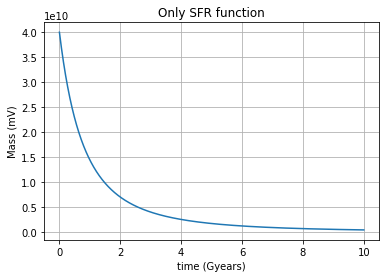

In [18]:
i = 0
dt=0.001 #MEGAyears#
steps = 10000 #Gigayears
while i < steps:
    t=i*dt
    time.append(t)
    #eg=intg.romberg(eject_gas,0.1,100,args=(surf_gas_density_array[-1],))
    sg=SFR(surf_gas_density_array[-1])
    #esg=eg-sg
    current_Mgas   =m_gas_array[-1]-sg*dt
    current_Vdensity=1.*current_Mgas/gal_vol
    current_Adensity=current_Vdensity*gal_width

    m_gas_array.append(current_Mgas)
    volum_gas_density_array.append(current_Vdensity)
    surf_gas_density_array.append(current_Adensity)
    i+=1
time.append(10)

#wharever


fig, ax = plt.subplots()
ax.plot(time, m_gas_array)

ax.set(xlabel='time (Gyears)', ylabel='Mass (mV)',
       title='Only SFR function')
ax.grid()

fig.savefig("test.png")
plt.show()
